<a href="https://colab.research.google.com/github/fmezacr/machinelearning/blob/main/Creaci%C3%B3n_de_Modelos_B%C3%A1sicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


---

<div style="font-size:small;">

MIT License

Copyright (c) [2024] Felipe Meza-Obando

*Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software for educational purposes only. You must give author appropriate credit, provide a link to the license and source, and indicate if changes were made.*
</div>

---

# Tutorial: Creación de Modelos de Aprendizaje Automático de Baja Complejidad
### Autor: ***Felipe Meza-Obando***

### Introducción

En este notebook, exploramos el uso de diferentes algoritmos de clasificación aplicados al famoso dataset **Iris**, que contiene información sobre tres especies de flores (Setosa, Versicolor, Virginica) basadas en cuatro características: longitud y ancho de sépalos y pétalos. Para simplificar la visualización de los resultados, en este análisis solo utilizamos las dos primeras características del dataset.

El objetivo principal es comparar el rendimiento de varios algoritmos de clasificación mediante:

1. **Support Vector Machine (SVM)**
2. **Random Forest**
3. **K-Nearest Neighbors (KNN)**
4. **Logistic Regression**
5. **Decision Tree**

El proceso seguido en esta notebook incluye:

- **División de los datos**: Separación del conjunto de datos en un conjunto de entrenamiento (70%) y uno de prueba (30%).
- **Entrenamiento de modelos**: Cada uno de los algoritmos mencionados se entrena usando el conjunto de entrenamiento.
- **Evaluación de los modelos**: Se utilizan las predicciones sobre el conjunto de prueba para calcular la métrica de precisión (**accuracy**), la cual refleja el porcentaje de clasificaciones correctas.
- **Visualización**: Para cada modelo, se grafica la **frontera de decisión**, que muestra cómo el modelo clasifica las distintas especies de flores, separando las clases basadas en las características seleccionadas.



In [ ]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Cargar el dataset Iris
iris = load_iris()
X = iris.data[:, :2]  # Solo usamos las dos primeras características para visualización
y = iris.target

# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definir función para graficar la frontera de decisión
def plot_decision_boundary(X, y, model, title):
    # Crear una malla de puntos para la gráfica
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predecir para cada punto de la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar la frontera de decisión
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolor='k', cmap=plt.cm.Paired)
    plt.xlabel(iris.feature_names[0])  # Nombre de la primera característica
    plt.ylabel(iris.feature_names[1])  # Nombre de la segunda característica
    plt.title(title)
    plt.show()

### 1. Modelo SVM para Clasificación




Accuracy para SVM: 0.8000


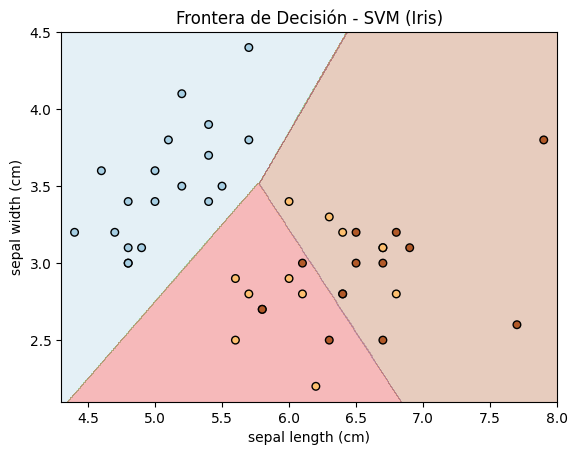

In [ ]:
# Crear un modelo SVM con un kernel lineal y un valor de regularización C de 1.0
svm_model = SVC(kernel='linear', C=1.0)

# Entrenar el modelo SVM con los datos de entrenamiento (X_train y y_train)
svm_model.fit(X_train, y_train)

# Usar el modelo entrenado para predecir las etiquetas del conjunto de prueba (X_test)
y_pred_svm = svm_model.predict(X_test)

# Calcular la precisión (accuracy) comparando las etiquetas reales (y_test) con las predicciones (y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Imprimir la precisión del modelo SVM con 4 decimales
print(f'Accuracy para SVM: {accuracy_svm:.4f}')

# Graficar la frontera de decisión para SVM
plot_decision_boundary(X_test, y_test, svm_model, 'Frontera de Decisión - SVM (Iris)')

### 2. Modelo Random Forest para Clasificación

Accuracy para Random Forest: 0.7556


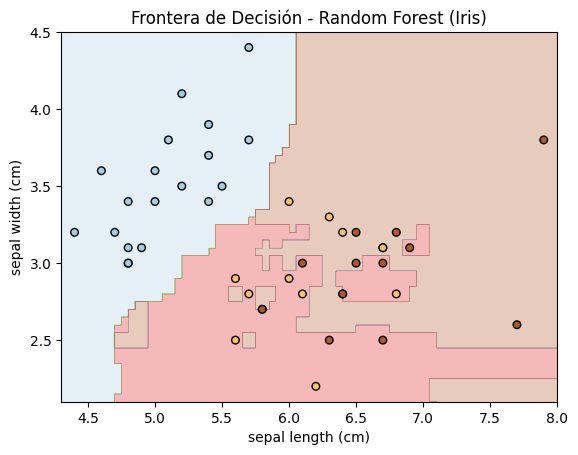

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predicción y cálculo del accuracy
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Accuracy para Random Forest: {accuracy_rf:.4f}')

# Graficar la frontera de decisión para Random Forest
plot_decision_boundary(X_test, y_test, rf_model, 'Frontera de Decisión - Random Forest (Iris)')

### 3. Modelo K-Nearest Neighbors (KNN)


Accuracy para KNN: 0.8000


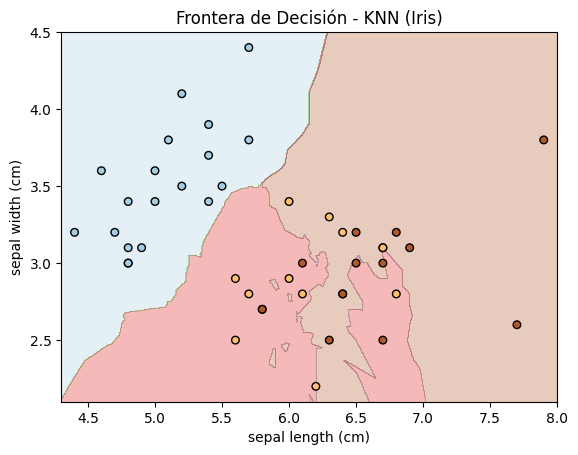

In [ ]:

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)

# Predicción y cálculo del accuracy
y_pred_knn = knn_model.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy para KNN: {accuracy_knn:.4f}')

# Graficar la frontera de decisión para KNN
plot_decision_boundary(X_test, y_test, knn_model, 'Frontera de Decisión - KNN (Iris)')

### 4. Modelo Logistic Regression

Accuracy para Logistic Regression: 0.8222


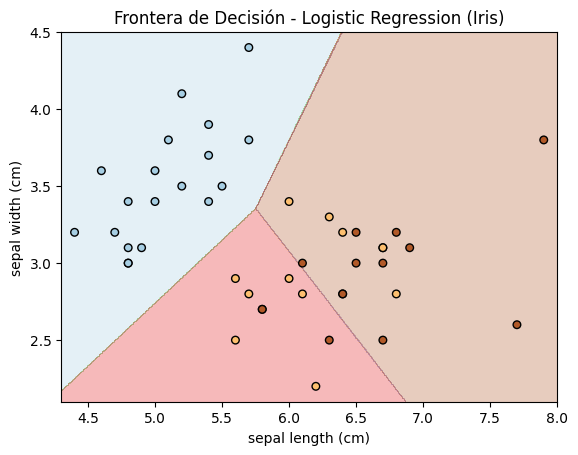

In [ ]:


logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

# Predicción y cálculo del accuracy
y_pred_logreg = logreg_model.predict(X_test)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print(f'Accuracy para Logistic Regression: {accuracy_logreg:.4f}')

# Graficar la frontera de decisión para Logistic Regression
plot_decision_boundary(X_test, y_test, logreg_model, 'Frontera de Decisión - Logistic Regression (Iris)')

### 5. Modelo Decision Tree

Accuracy para Decision Tree: 0.7556


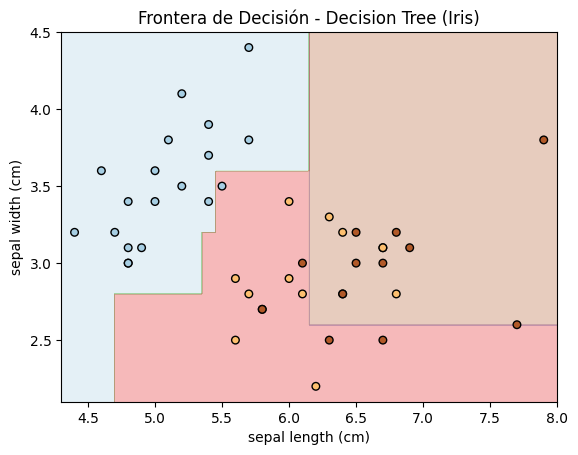

In [ ]:
dt_model = DecisionTreeClassifier(max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)

# Predicción y cálculo del accuracy
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy para Decision Tree: {accuracy_dt:.4f}')

# Graficar la frontera de decisión para Decision Tree
plot_decision_boundary(X_test, y_test, dt_model, 'Frontera de Decisión - Decision Tree (Iris)')

In [ ]:
import pandas as pd

# Crear un diccionario con los resultados de accuracy de cada modelo
resultados = {
    'Modelo': ['SVM', 'Random Forest', 'KNN', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [accuracy_svm, accuracy_rf, accuracy_knn, accuracy_logreg, accuracy_dt]
}

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(resultados)

# Mostrar la tabla con los resultados
#print(resultados_df)

# Opcional: Mostrar la tabla en formato más bonito si estás en una notebook
from IPython.display import display
display(resultados_df)

,Modelo,Accuracy
0,SVM,0.800000
1,Random Forest,0.755556
2,KNN,0.777778
3,Logistic Regression,0.822222
4,Decision Tree,0.755556


### Análisis de los Resultados:

1. **Logistic Regression**: Este modelo ha obtenido el mejor rendimiento, con un **accuracy** de **0.8222**. Esto sugiere que la regresión logística maneja bien las relaciones lineales entre las características del dataset y las clases objetivo.

2. **SVM**: El modelo de **SVM** ha obtenido un **accuracy** de **0.8000**, lo que indica un rendimiento ligeramente inferior al de la regresión logística, pero aún así es bastante competitivo. Este resultado puede mejorarse ajustando los hiperparámetros o utilizando diferentes kernels.

3. **KNN**: Con un **accuracy** de **0.7778**, el algoritmo **K-Nearest Neighbors** muestra un buen rendimiento, aunque algo menor que **SVM** y **Logistic Regression**. Este modelo podría beneficiarse de una selección cuidadosa del parámetro **k**, como se mostró en el análisis de la curva de aprendizaje.

4. **Random Forest** y **Decision Tree**: Ambos modelos de árboles de decisión tienen el mismo **accuracy** de **0.7556**. Aunque los árboles de decisión suelen ser efectivos, en este caso no han superado a los modelos lineales. **Random Forest** es un modelo de ensamble que generalmente mejora los resultados de un solo árbol, pero en este conjunto de datos no ha mostrado una ventaja clara.

### Conclusión:

En general, los modelos lineales como **Logistic Regression** y **SVM** han mostrado mejor rendimiento en este caso, probablemente debido a la simplicidad de las relaciones entre las características del dataset. **KNN** ha mostrado un rendimiento aceptable, y los modelos basados en árboles podrían requerir más ajuste para mejorar su rendimiento.

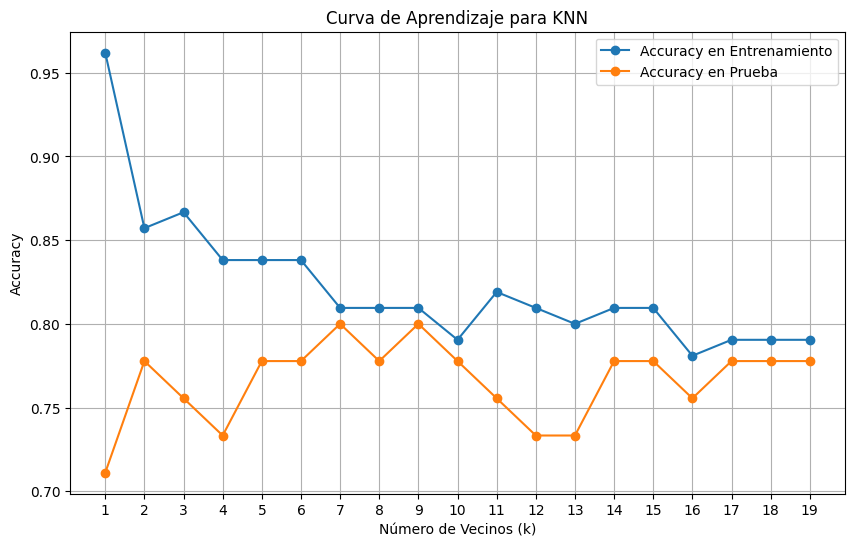

In [ ]:
# Librerías adicionales necesarias
from sklearn.metrics import accuracy_score

# Definir rangos de k a probar
k_values = range(1, 20)  # Probar k desde 1 hasta 20

# Listas para almacenar los resultados
train_accuracies = []
test_accuracies = []

# Evaluar el rendimiento para diferentes valores de k
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)

    # Calcular accuracy en entrenamiento y prueba
    train_accuracy = accuracy_score(y_train, knn_model.predict(X_train))
    test_accuracy = accuracy_score(y_test, knn_model.predict(X_test))

    # Almacenar los resultados
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Graficar la curva de aprendizaje en función de k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, label='Accuracy en Entrenamiento', marker='o')
plt.plot(k_values, test_accuracies, label='Accuracy en Prueba', marker='o')

# Ajustar la escala del eje x para que se vea en intervalos de 1 en 1
plt.xticks(ticks=k_values)

plt.xlabel('Número de Vecinos (k)')
plt.ylabel('Accuracy')
plt.title('Curva de Aprendizaje para KNN')
plt.legend()
plt.grid(True)
plt.show()

### Análisis de la Curva de Aprendizaje para KNN:

En el gráfico, se observa la **precisión (accuracy)** en los conjuntos de entrenamiento y prueba a medida que se varía el número de vecinos (**k**) en el modelo **K-Nearest Neighbors (KNN)**.

- **K=1** muestra un **overfitting** claro, con una precisión extremadamente alta en el conjunto de entrenamiento (0.95) pero una precisión mucho más baja en el conjunto de prueba (0.72).
- A medida que **k** aumenta, el **overfitting** disminuye y las curvas de entrenamiento y prueba se estabilizan.
- El rendimiento en el conjunto de prueba se estabiliza entre **k=6** y **k=14**, lo que indica que estos valores de **k** podrían ser óptimos, ya que la precisión es más consistente y las diferencias entre los conjuntos de entrenamiento y prueba son menores.

### Conclusión:
Un valor de **k** alrededor de **7** o **9** parece ser el más equilibrado, evitando tanto el **overfitting** como el **underfitting**. Este rango ofrece un buen compromiso entre generalización y precisión en el conjunto de prueba.